In [1]:
import pandas as pd
from tqdm import tqdm


In [2]:
df = pd.read_csv('../parsed_data/cleaned_data/articles.A-B.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df2 = pd.read_csv('../parsed_data/cleaned_data/articles.C-H.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df3 = pd.read_csv('../parsed_data/cleaned_data/articles.I-N.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df4 = pd.read_csv('../parsed_data/cleaned_data/articles.O-Z.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})


In [3]:
merged = pd.concat([df, df2,df3,df4], ignore_index=True).dropna(subset=['PMCID'])#.set_index('PMCID')

print(merged['PMCID'].isna().sum())

0


In [4]:
merged['PMCID'] = merged['PMCID'].astype(int)
print(merged)

                        journal    PMCID  ack_present
0            20_Century_Br_Hist  4804230        False
1            20_Century_Br_Hist  5905639        False
2                  3D_Print_Med  5954787        False
3                  3D_Print_Med  5954788        False
4                  3D_Print_Med  5954789        False
5                  3D_Print_Med  5954790        False
6                  3D_Print_Med  5954791        False
7                  3D_Print_Med  5954792        False
8                  3D_Print_Med  5954793        False
9                  3D_Print_Med  5954794        False
10                 3D_Print_Med  5954795        False
11                 3D_Print_Med  5954796        False
12                 3D_Print_Med  5954797        False
13                 3D_Print_Med  5954798        False
14                 3D_Print_Med  5954799        False
15                 3D_Print_Med  5970151        False
16                 3D_Print_Med  6027614        False
17                 3D_Print_

In [5]:
merged = merged.drop_duplicates(subset=["PMCID"]).set_index('PMCID')

print(merged)

                        journal  ack_present
PMCID                                       
4804230      20_Century_Br_Hist        False
5905639      20_Century_Br_Hist        False
5954787            3D_Print_Med        False
5954788            3D_Print_Med        False
5954789            3D_Print_Med        False
5954790            3D_Print_Med        False
5954791            3D_Print_Med        False
5954792            3D_Print_Med        False
5954793            3D_Print_Med        False
5954794            3D_Print_Med        False
5954795            3D_Print_Med        False
5954796            3D_Print_Med        False
5954797            3D_Print_Med        False
5954798            3D_Print_Med        False
5954799            3D_Print_Med        False
5970151            3D_Print_Med        False
6027614            3D_Print_Med        False
6036609            3D_Print_Med         True
6036611            3D_Print_Med         True
6036663            3D_Print_Med        False
6036666   

In [6]:
merge_cols = ['Pub Year', 'MeSH Keywords', 'MeSH Extracted','RCR','Journal Name']

for col in merge_cols:
    merged[col] = None

In [ ]:




pub_data['PMCID'] = x['PMCID'].str[3:]
    x['PMCID'] = x['PMCID'].str.split(pat=".", expand=True)[0]
    x = x[x['PMCID'].str.isnumeric() == True]
    x['PMCID'] = x['PMCID'].astype(int)
    #print(x['PMCID'])
    x = x.drop_duplicates(subset=["PMCID"]).set_index("PMCID")

    idx = x.index.isin(merged.index)
    x = x[idx]

    #print(len(x))
    #continue

    assert(x.index.isna().sum() == 0)
    for col in merge_cols:
        merged.loc[x.index, col] = x.ix[x.index, col].values
        #print(merged[merged['Pub Year'].isna() == False])
    #print(merged)
    print(merged['Pub Year'].isna().mean())

In [37]:
pub_data = pd.read_csv('../source_data/PMC_info-iSearch_-_Publications-export_2018-09-04-20-53-47.csv')
print(pub_data)

/home/ubuntu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,9,11,26,27,39,40,41,42,43,44,45,46,47,49,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                  Cross Ref ID                           DOI  \
0                                          NaN                           NaN   
1                                          NaN                           NaN   
2                                          NaN                           NaN   
3                                          NaN                           NaN   
4                                          NaN                           NaN   
5                                          NaN                           NaN   
6                                          NaN                           NaN   
7                                          NaN                           NaN   
8                                          NaN                           NaN   
9                                          NaN                           NaN   
10                                         NaN                           NaN   
11       info:doi/10.1016/j.simyco.2018.

In [38]:
print(pub_data.head())

  Cross Ref ID  DOI NLM Unique Id       PMCID      PMID    Pub Date  \
0          NaN  NaN     100900466  PMC5897966  29631650  2019-03-01   
1          NaN  NaN     100900466  PMC5897967  29631651  2019-03-01   
2          NaN  NaN     100900466  PMC5897968  29631652  2019-03-01   
3          NaN  NaN     100900466  PMC5897969  29631653  2019-03-01   
4          NaN  NaN     100900466  PMC5897970  29631654  2019-03-01   

         Pub Types  Pub Year  \
0  Journal Article      2019   
1  Journal Article      2019   
2  Journal Article      2019   
3  Journal Article      2019   
4  Journal Article      2019   

                                               Title MeSH Keywords    ...     \
0                The AALAS Journals: 2017 in Review.           NaN    ...      
1                    Animal Models of Aspergillosis.           NaN    ...      
2  Comparative Review of Antimicrobial Resistance...           NaN    ...      
3  Cohousing Male Mice with and without Segmental...        

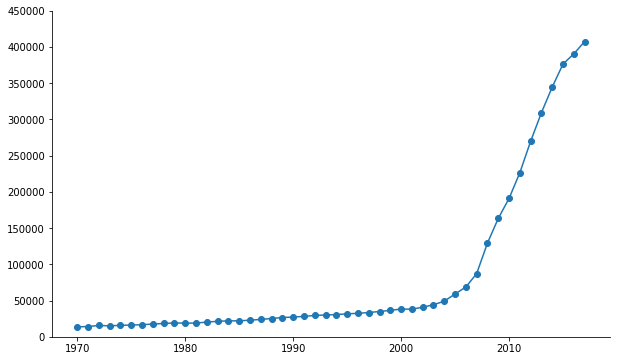

In [41]:
years_orig = pub_data['Pub Year'].value_counts(sort=False, ascending=True)

years_orig = years_orig[years_orig.index <= 2017]
years_orig = years_orig[years_orig.index >= 1970]

plt.figure(figsize=[10,6])

plt.ylim(0, 450000)
plt.plot(years_orig, marker='o')

sns.despine()

In [42]:
pub_data['PMCID'] = pub_data['PMCID'].str[3:]

print(pub_data['PMCID'])

0          5897966
1          5897967
2          5897968
3          5897969
4          5897970
5          5897971
6          5897972
7          5897973
8          5897974
9          5897975
10         5897976
11         6020082
12         6027753
13         6030544
14         6031069
15         6080641
16         6086327
17         6099139
18         6099140
19         6099149
20         6099143
21         6099152
22         6099148
23         6099144
24         6099147
25         6099135
26         6099133
27         6099138
28         6099134
29         6099150
            ...   
4595337    2128807
4595338    2128810
4595339    2128801
4595340    2128808
4595341    2128802
4595342    2128797
4595343    2128794
4595344    5111431
4595345    5111433
4595346    5111434
4595347    5111435
4595348    5111436
4595349    5111437
4595350    5111438
4595351    5111439
4595352    5111440
4595353    5111441
4595354    5111444
4595355    5111446
4595356    5111448
4595357    5111449
4595358    5

In [43]:
pub_data['PMCID'] = pub_data['PMCID'].str.split(pat=".", expand=True)[0]
print(pub_data['PMCID'])

0          5897966
1          5897967
2          5897968
3          5897969
4          5897970
5          5897971
6          5897972
7          5897973
8          5897974
9          5897975
10         5897976
11         6020082
12         6027753
13         6030544
14         6031069
15         6080641
16         6086327
17         6099139
18         6099140
19         6099149
20         6099143
21         6099152
22         6099148
23         6099144
24         6099147
25         6099135
26         6099133
27         6099138
28         6099134
29         6099150
            ...   
4595337    2128807
4595338    2128810
4595339    2128801
4595340    2128808
4595341    2128802
4595342    2128797
4595343    2128794
4595344    5111431
4595345    5111433
4595346    5111434
4595347    5111435
4595348    5111436
4595349    5111437
4595350    5111438
4595351    5111439
4595352    5111440
4595353    5111441
4595354    5111444
4595355    5111446
4595356    5111448
4595357    5111449
4595358    5

In [44]:
pub_data = pub_data[pub_data['PMCID'].str.isnumeric() == True]
print(pub_data['PMCID'])

0          5897966
1          5897967
2          5897968
3          5897969
4          5897970
5          5897971
6          5897972
7          5897973
8          5897974
9          5897975
10         5897976
11         6020082
12         6027753
13         6030544
14         6031069
15         6080641
16         6086327
17         6099139
18         6099140
19         6099149
20         6099143
21         6099152
22         6099148
23         6099144
24         6099147
25         6099135
26         6099133
27         6099138
28         6099134
29         6099150
            ...   
4595337    2128807
4595338    2128810
4595339    2128801
4595340    2128808
4595341    2128802
4595342    2128797
4595343    2128794
4595344    5111431
4595345    5111433
4595346    5111434
4595347    5111435
4595348    5111436
4595349    5111437
4595350    5111438
4595351    5111439
4595352    5111440
4595353    5111441
4595354    5111444
4595355    5111446
4595356    5111448
4595357    5111449
4595358    5

In [45]:
pub_data['PMCID'] = pub_data['PMCID'].astype(int)
pub_data = pub_data.drop_duplicates(subset=["PMCID"]).set_index("PMCID")
print(pub_data)

                                  Cross Ref ID                           DOI  \
PMCID                                                                          
5897966                                    NaN                           NaN   
5897967                                    NaN                           NaN   
5897968                                    NaN                           NaN   
5897969                                    NaN                           NaN   
5897970                                    NaN                           NaN   
5897971                                    NaN                           NaN   
5897972                                    NaN                           NaN   
5897973                                    NaN                           NaN   
5897974                                    NaN                           NaN   
5897975                                    NaN                           NaN   
5897976                                 

In [46]:
idx = pub_data.index.isin(merged.index)
pub_data = pub_data[idx]

print(pub_data)

                                  Cross Ref ID                           DOI  \
PMCID                                                                          
6020082  info:doi/10.1016/j.simyco.2018.05.001  10.1016/j.simyco.2018.05.001   
6030544                                    NaN  10.1016/j.simyco.2018.04.001   
6031069                                    NaN  10.1016/j.simyco.2018.04.002   
6099139                                    NaN      10.22074/cellj.2019.5507   
6099140                                    NaN      10.22074/cellj.2019.5423   
6099149                                    NaN      10.22074/cellj.2019.5521   
6099143                                    NaN      10.22074/cellj.2019.5542   
6099152                                    NaN      10.22074/cellj.2019.5591   
6099148                                    NaN      10.22074/cellj.2019.5661   
6099144                                    NaN      10.22074/cellj.2019.5654   
6099147                                 

In [47]:
for col in merge_cols:
    merged[col] = pub_data[col]

print(merged)

                        journal  ack_present  Pub Year  \
PMCID                                                    
4804230      20_Century_Br_Hist        False    2015.0   
5905639      20_Century_Br_Hist        False    2017.0   
5954787            3D_Print_Med        False    2017.0   
5954788            3D_Print_Med        False    2017.0   
5954789            3D_Print_Med        False    2017.0   
5954790            3D_Print_Med        False    2017.0   
5954791            3D_Print_Med        False    2018.0   
5954792            3D_Print_Med        False    2018.0   
5954793            3D_Print_Med        False    2017.0   
5954794            3D_Print_Med        False    2018.0   
5954795            3D_Print_Med        False    2018.0   
5954796            3D_Print_Med        False    2017.0   
5954797            3D_Print_Med        False    2017.0   
5954798            3D_Print_Med        False    2017.0   
5954799            3D_Print_Med        False    2017.0   
5970151       

In [48]:
print(merged['Pub Year'].value_counts())

2017.0    289174
2016.0    259805
2015.0    233825
2014.0    205344
2018.0    176434
2013.0    169903
2012.0    135991
2011.0    100801
2010.0     73207
2009.0     53263
2008.0     39205
2007.0     24106
2006.0     17338
2005.0     12507
2004.0      8304
2003.0      6252
2002.0      5569
2001.0      4715
2000.0      3980
1999.0      3588
1998.0      3579
1997.0      3410
1996.0      3274
1995.0      3040
1994.0      3026
1993.0      2806
1991.0      2460
1990.0      2394
1992.0      2376
1989.0      2283
           ...  
1834.0        73
1863.0        72
1825.0        72
1836.0        71
1816.0        69
1839.0        68
1833.0        68
1841.0        68
1844.0        67
1818.0        67
1824.0        65
1835.0        65
1832.0        63
1840.0        63
1842.0        62
1843.0        61
1852.0        59
1851.0        58
1827.0        57
1837.0        56
1838.0        55
1854.0        47
1848.0        45
1853.0        44
1850.0        43
1819.0        32
2019.0        24
1849.0        

In [69]:
import pylab as plt
import seaborn as sns

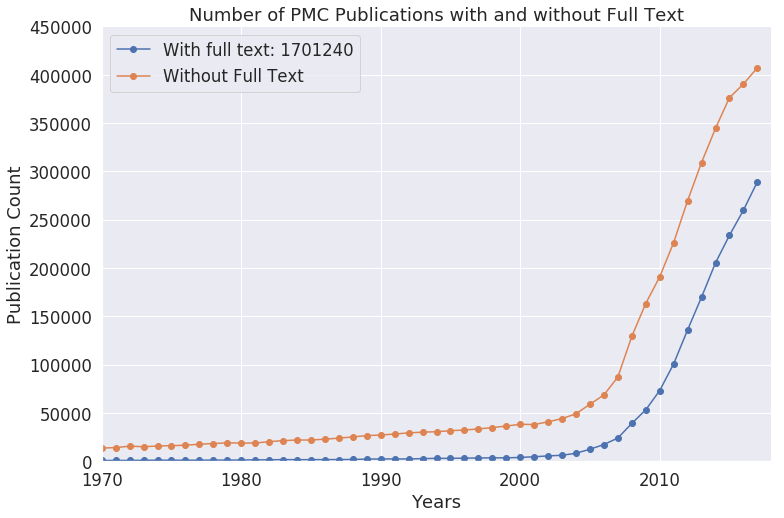

In [72]:




years = merged['Pub Year'].value_counts(sort=False, ascending=True)

years = years[years.index <= 2017]
years = years[years.index >= 1970]

plt.figure(figsize=[12,8])
plt.ylim(0, 450000)
sns.set(font='sans-serif', font_scale=1.5)

plt.xlim(1970, 2018)
plt.xlabel('Years')
plt.ylabel('Publication Count')
plt.title('Number of PMC Publications with and without Full Text')

plt.plot(years, marker='o', label=f'With full text: {years.sum()}')
plt.plot(years_orig, marker='o', label='All PMC : {years_orig.sum()}')
plt.legend(loc='upper left')
sns.despine()

